Reference https://stackabuse.com/linear-regression-in-python-with-scikit-learn/

Non linear example: https://inria.github.io/scikit-learn-mooc/python_scripts/linear_regression_non_linear_link.html 

In [1]:
import pandas as pd

In [3]:
path_to_file = 'petrol_consumption.csv'
df = pd.read_csv(path_to_file)

In [5]:
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [7]:
#In this dataset, we have 48 rows and 5 columns. 
#When classifying the size of a dataset, there are also differences between Statistics and Computer Science.
df.shape

(48, 5)

In [9]:
print(df.describe().round(2).T)

                              count     mean      std      min      25%  \
Petrol_tax                     48.0     7.67     0.95     5.00     7.00   
Average_income                 48.0  4241.83   573.62  3063.00  3739.00   
Paved_Highways                 48.0  5565.42  3491.51   431.00  3110.25   
Population_Driver_licence(%)   48.0     0.57     0.06     0.45     0.53   
Petrol_Consumption             48.0   576.77   111.89   344.00   509.50   

                                  50%      75%       max  
Petrol_tax                       7.50     8.12     10.00  
Average_income                4298.00  4578.75   5342.00  
Paved_Highways                4735.50  7156.00  17782.00  
Population_Driver_licence(%)     0.56     0.60      0.72  
Petrol_Consumption             568.50   632.75    968.00  


In our simple regression scenario, we've used a scatterplot of the dependent and independent variables to see if the shape of the points was close to a line. In out current scenario, we have four independent variables and one dependent variable. To do a scatterplot with all the variables would require one dimension per variable, resulting in a 5D plot.

We could create a 5D plot with all the variables, which would take a while and be a little hard to read - or we could plot one scatterplot for each of our independent variables and dependent variable to see if there's a linear relationship between them.

Notice in the above code, that we are importing Seaborn, creating a list of the variables we want to plot, and looping through that list to plot each independent variable with our dependent variable.

The Seaborn plot we are using is regplot, which is short from regression plot. It is a scatterplot that already plots the scattered data along with the regression line. If you'd rather look at a scatterplot without the regression line, use sns.scatteplot instead.

These are our four plots:

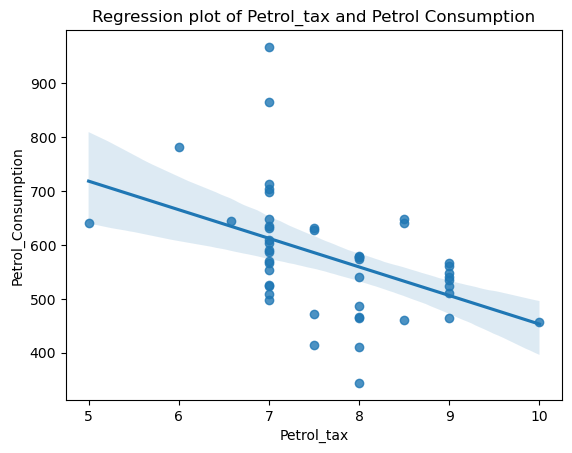

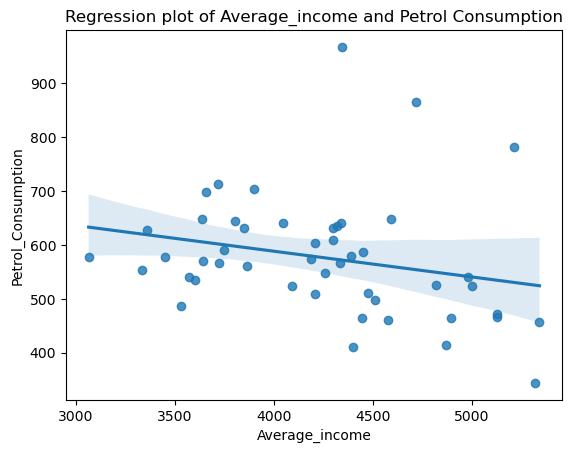

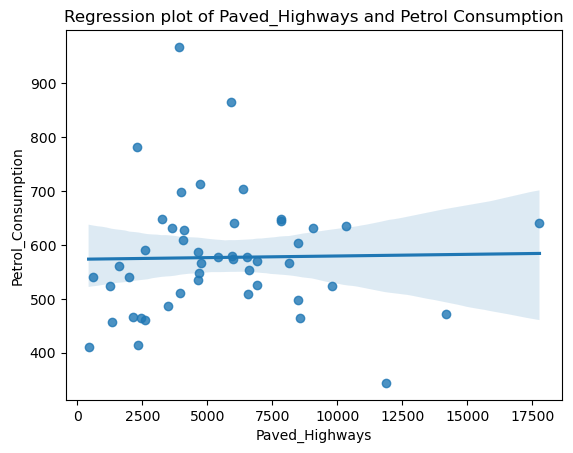

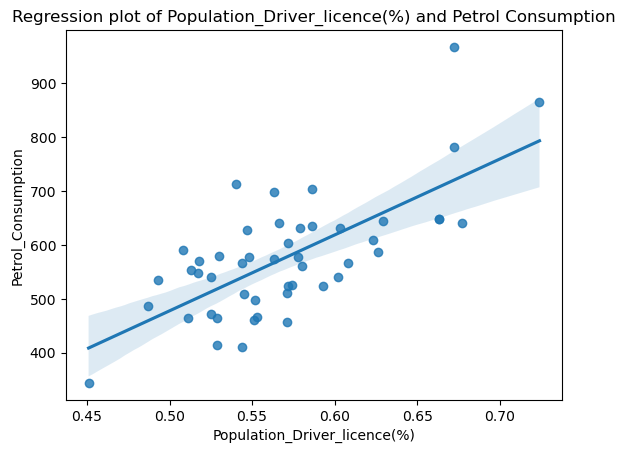

In [11]:
import seaborn as sns # Convention alias for Seaborn
import matplotlib.pyplot as plt

variables = ['Petrol_tax', 'Average_income', 'Paved_Highways','Population_Driver_licence(%)']

for var in variables:
    plt.figure() # Creating a rectangle (figure) for each plot
    # Regression Plot also by default includes
    # best-fitting regression line
    # which can be turned off via `fit_reg=False`
    sns.regplot(x=var, y='Petrol_Consumption', data=df).set(title=f'Regression plot of {var} and Petrol Consumption');

Another important thing to notice in the regplots is that there are some points really far off from where most points concentrate, we were already expecting something like that after the big difference between the mean and std columns - those points might be data outliers and extreme values.

In [12]:
y = df['Petrol_Consumption']
X = df[['Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)', 'Petrol_tax']]

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [16]:
#Training the Multivariate Model
X.shape # (48, 4)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [17]:
#After fitting the model and finding our optimal solution, we can also look at the intercept:
regressor.intercept_

361.4508790666836

In [19]:
#And at the coefficients of the features
print(regressor.coef_)

#Those four values are the coefficients for each of our features in the same order as we have them in our X data. 
#To see a list with their names, we can use the dataframe columns attribute:
feature_names = X.columns
feature_names

[-5.65355145e-02 -4.38217137e-03  1.34686930e+03 -3.69937459e+01]


Index(['Average_income', 'Paved_Highways', 'Population_Driver_licence(%)',
       'Petrol_tax'],
      dtype='object')

In [20]:
model_coefficients = regressor.coef_

coefficients_df = pd.DataFrame(data = model_coefficients, 
                              index = feature_names, 
                              columns = ['Coefficient value'])
print(coefficients_df)

                              Coefficient value
Average_income                        -0.056536
Paved_Highways                        -0.004382
Population_Driver_licence(%)        1346.869298
Petrol_tax                           -36.993746


In [21]:
#Making predictions
y_pred = regressor.predict(X_test)
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)

    Actual   Predicted
27     631  606.692665
40     587  673.779442
26     577  584.991490
43     591  563.536910
24     460  519.058672
37     704  643.461003
12     525  572.897614
19     640  687.077036
4      410  547.609366
25     566  530.037630


In [23]:
#Evaluating the model
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 53.47
Mean squared error: 4083.26
Root mean squared error: 63.90


We can see that the value of the RMSE is 63.90, which means that our model might get its prediction wrong by adding or subtracting 63.90 from the actual value. It would be better to have this error closer to 0, and 63.90 is a big number - this indicates that our model might not be predicting very well.

The R2 doesn't tell us about how far or close each predicted value is from the real data - it tells us how much of our target is being captured by our model.

In [34]:
regressor.score(X_test, y_test)
# the model only explains 39% of the test data :(

0.3913664001430538

In [35]:
regressor.score(X_train, y_train)
# the model only explains 70% of the train data


0.7068781342155135

It explains 70% of the train data, but only 39% of our test data, which is more important to get right than our train data. It is fitting the train data really well, and not being able to fit the test data - which means, we have an overfitted multiple linear regression model.

In [ ]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel="linear", C=100, gamma="auto")
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)

In [ ]:
svr_poly.fit(X_train, y_train)

In [ ]:
svr_poly.intercept_

In [ ]:
y_pred = svr_poly.predict(X_test)

In [52]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 64.06
Mean squared error: 6724.83
Root mean squared error: 82.01
